# 规划求解

来源 https://www.youtube.com/watch?v=ms3aKKW_iRc&list=PLgA4wLGrqI-k51wG52O5PpDZAIL6eyvDK&index=54
https://github.com/yongtwang/engineering-python

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [4]:
def f(x):
    return x**2 + 10*np.sin(x)
x = np.linspace(-10, 10, 51)
y = f(x)
display(x)
display(y)

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

<IPython.core.display.Javascript object>


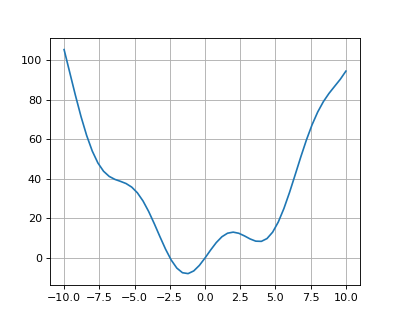

In [3]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.grid(True)
plt.show()

In [5]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Objective function to be minimized.
              x0=0,  # Initial guess.
              maxiter=2000,  # Maximum number of iterations to perform.
              full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.


Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


<IPython.core.display.Javascript object>


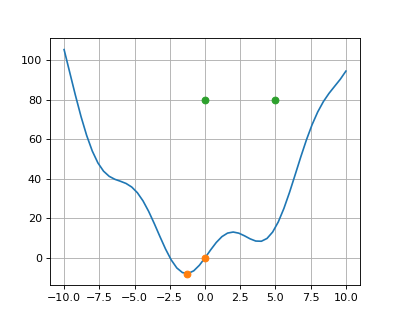

In [14]:
x0=0
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.plot([0,5],[80,80], 'o')
plt.grid(True)
plt.show()

In [5]:
res = \
    opt.basinhopping(f, 
                     x0=6, 
                     T=1,  # The “temperature” parameter
                     stepsize=2)  # Initial step size
res

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.085822]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1878
                        nit: 100
                       njev: 626
                          x: array([-1.30644001])

<IPython.core.display.Javascript object>


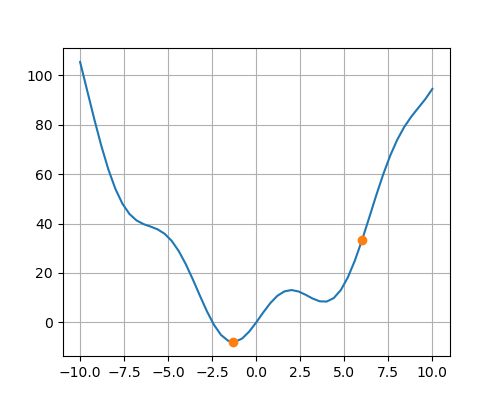

In [11]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([6, res.x], [f(6), res.fun], 'o')
plt.grid(True)
plt.show()

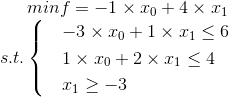

     con: array([0.])
     fun: -15.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([18.,  7.])
  status: 0
 success: True
       x: array([ 3., -3.])
###################################
-22
-15


In [37]:
from IPython.display import Image
from IPython.core.display import HTML 
display(Image(filename="func.gif"))

from scipy.optimize import linprog
C = [-1,4] 
A = [[-3,1],[1,2]]
b = [6,4]
Aeq=[[1,1]]
beq=[0]
X0_bounds = [None,None]
X1_bounds = [-3,None]
res = linprog(C,A,b,Aeq,beq,bounds=(X0_bounds,X1_bounds))
print(res)
print("###################################")

def func1(x0,x1):
    return -x0+4*x1
print(func1(10,-3))
print(func1(3,-3))

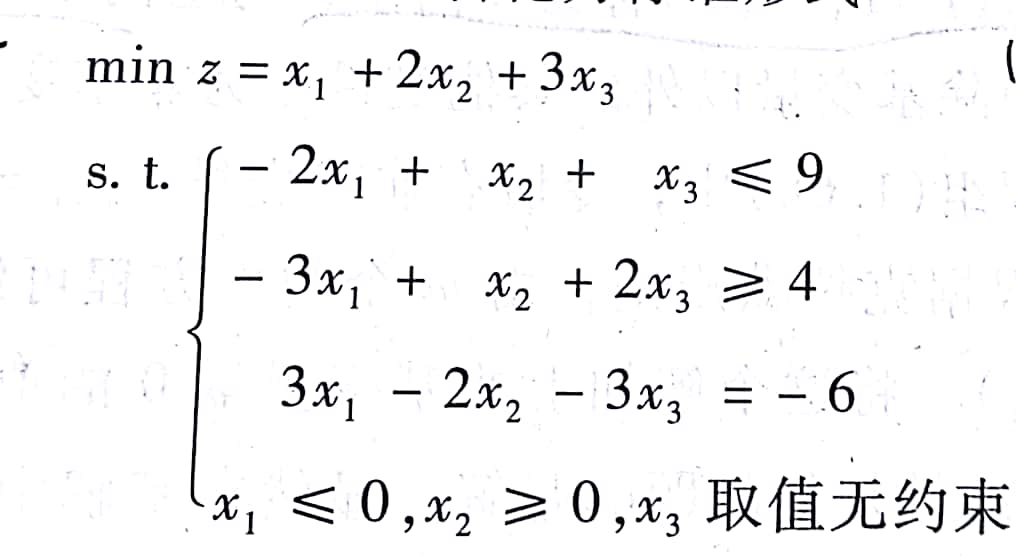

     con: array([1.77635684e-15])
     fun: -22.000000000000007
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([-1.77635684e-15,  7.00000000e+00])
  status: 0
 success: True
       x: array([-7.,  0., -5.])


In [44]:
display(Image(filename="problem1.jpg",width=300,height=300))
c = np.array([1,2,3])
A_ub = np.array([[-2,1,1],[3,-1,-2]])
b_ub = np.array([9,-4])
A_eq = np.array([[3,-2,-3]])
b_eq = np.array([-6])
r = linprog(c,A_ub,b_ub,A_eq,b_eq,bounds=((None,0),(0,None),(None,None)))
print(r)

<IPython.core.display.Javascript object>


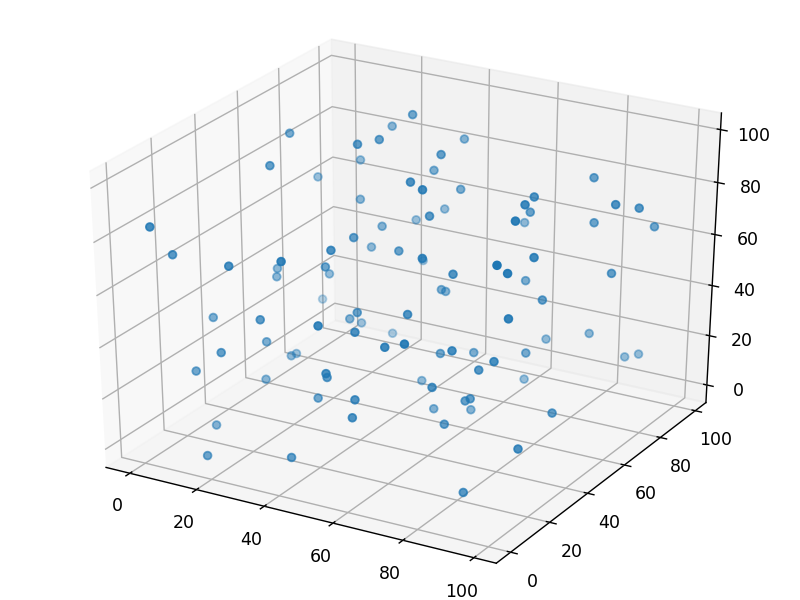

In [39]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(range(-100, 100))
sequence_containing_y_vals = list(range(-3, 100))
sequence_containing_z_vals = list(range(0, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

五 · Example：The Reddy Mikks CompanyReddy Mikks produce 3 paints ( interior ,exterior and theme ) from 2 materials M1 and M2 . The following table providersthe basic data of the problem 

                Exterior Interior Theme    limit 
M1              1         2        3        10 
M2              0         1        2         5 
Profit         1000      2000    3000

Reddy Mikky wants to determine the best product mix of interior , exterior and theme points that maximizes the total daily profit

作者：FasonRao
链接：https://www.jianshu.com/p/fdc6119a608c
来源：简书
简书著作权归作者所有，任何形式的转载都请联系作者获得授权并注明出处。

\left \{ x : 1, \quad y : 2, \quad z : -1\right \}

In [1]:
from pulp import *

prob = LpProblem("problem1",LpMaximize)

x1 = LpVariable("x1",0,None,LpContinuous)
x2 = LpVariable("x2",0,None,LpContinuous)
x3 = LpVariable("x3",0,None,LpContinuous)

prob += 1000 * x1 + 2000 * x2 + 3000 * x3

prob += x1 + 2 * x2 + 3 * x3 <= 10
prob += 0 * x1 + x2 + 2 * x3 <= 5

prob.writeLP("problem1.lp")

prob.solve()

print("\n","status:",LpStatus[prob.status],"\n")

for v in prob.variables():
    print("\t",v.name,"=",v.varValue,"tons","\n")
    
print("Maximun Daily Profit =","Rs",value(prob.objective))


 status: Optimal 

	 x1 = 2.5 tons 

	 x2 = 0.0 tons 

	 x3 = 2.5 tons 

Maximun Daily Profit = Rs 10000.0


In [11]:
from sympy import *

x,y,z = symbols('x y z')
print(solve(x * 9 - 6,x))
print(solve([3 * x + 5 * y - 19, 4*x - 3 * y - 6],[x,y]))
print(solve([3 * x + 5 * y - 19, 4*x - 3 * y - 6],[x,y]))
f1 = x+y+z-2
f2 = 2*x-y+z+1
f3 = x+2*y+2*z-3
r3 = solve([f1, f2, f3], [x, y, z])
print("r3:", r3)

[2/3]
{x: 3, y: 2}
{x: 3, y: 2}
r3: {x: 1, y: 2, z: -1}
